### 載入工具

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 資料：訓練集、標籤集

[3.62434536 1.38824359] [0.]
[-2.03536792  0.11060505] [1.]


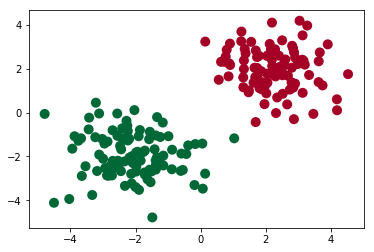

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, )
y1 = np.ones(100)                       # class1 y shape=(100, )
x_train = np.vstack((x0, x1))           # shape (200, 2) + some noise
y_train = np.hstack((y0, y1))[:, np.newaxis] # shape (200, )

print(x_train[0], y_train[0])
print(x_train[-1], y_train[-1])

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.reshape(200,), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
### 建構 Tensorflow 的 Graph

In [4]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

hypothesis = tf.layers.dense(x, 1)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=hypothesis))
hypothesis = tf.nn.sigmoid(hypothesis)
# cost = tf.reduce_mean(tf.losses.log_loss(y, hypothesis)) # cross entropy

train = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)

predict = tf.cast(tf.greater_equal(hypothesis, 0.5), tf.float32)
correct = tf.cast(tf.equal(predict, y), tf.float32)
accuracy = tf.reduce_mean(tf.reduce_min(correct, 1))

In [5]:
### 建 Session、初始變數、開始訓練

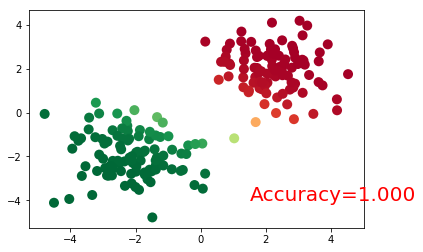

step 0 accuracy 1.0 cost 0.028488701


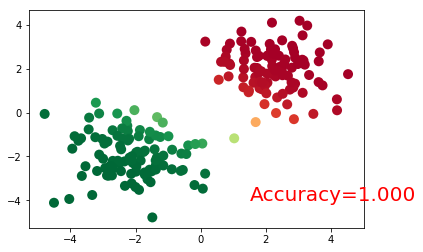

step 100 accuracy 1.0 cost 0.028462358


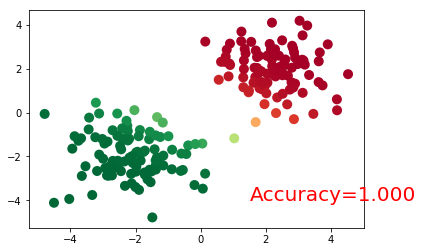

step 200 accuracy 1.0 cost 0.028436046


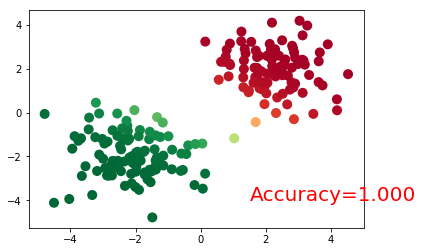

step 300 accuracy 1.0 cost 0.02840976


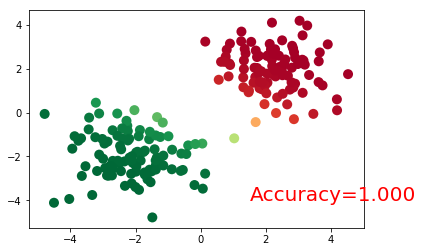

step 400 accuracy 1.0 cost 0.028383505


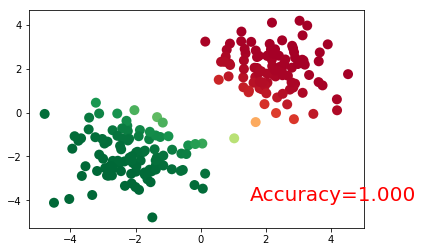

step 500 accuracy 1.0 cost 0.028357282


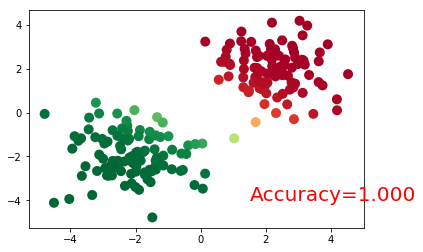

step 600 accuracy 1.0 cost 0.028331084


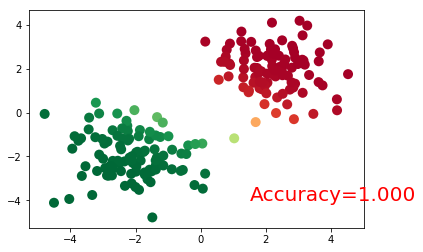

step 700 accuracy 1.0 cost 0.02830492


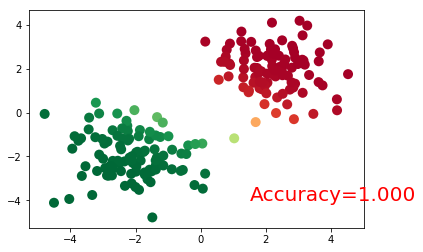

step 800 accuracy 1.0 cost 0.028278785


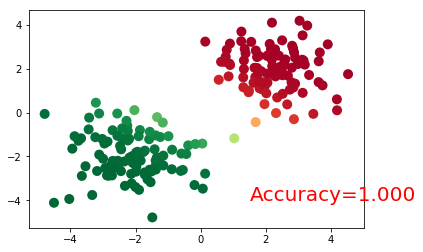

step 900 accuracy 1.0 cost 0.028252676


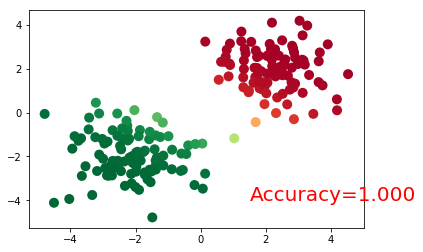

step 1000 accuracy 1.0 cost 0.028226595


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    y_, a_, c_, _ = sess.run([hypothesis, accuracy, cost, train], feed_dict={x:x_train, y:y_train})
#     y_, a_, c_, _ = sess.run([hypothesis, accuracy, cost, train], feed_dict={x:x_train, y:y_train})
    if step%100 == 0:
        plt.cla()
        plt.scatter(x_train[:, 0], x_train[:, 1], c=y_.reshape(200, ), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.3f' % a_, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        print('step', step, 'accuracy', a_, 'cost', c_)
plt.show()

### 預測新資料

[[0.703847]]


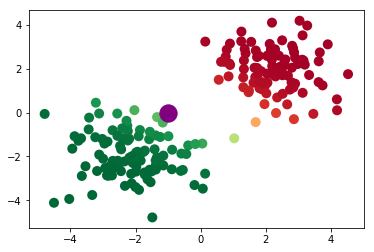

In [7]:
x_new = np.array([[-1, 0]])
print(sess.run(tf.nn.sigmoid(hypothesis), feed_dict={x:x_new}))
# print(sess.run(hypothesis, feed_dict={x:x_new}))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_.reshape(200, ), s=100, lw=0, cmap='RdYlGn')
plt.scatter(x_new[0, 0], x_new[0, 1], c='purple', s=300)